In [1]:
import numpy as np
import re

In [2]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


In [3]:
def sigmoid(z):
    #z=np.clip(z,-5,5)
    a = 1/(1+np.exp(-z))
    return a

In [4]:
def sigmoidDerivative(z):
    #z=np.clip(z,-5,5)
    a = np.exp(-z)/((1+np.exp(-z))**2)
    return a

In [5]:
def forward (data, W1,W2):
    Z2 = np.dot(data,W1)
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W2)
    yPrime = sigmoid(Z3)
    return np.array(A2), np.array(yPrime)

In [6]:
def backPropagation(data, W1, W2, output_label, yPrime,A2, learning_rate):
    delta3 = np.multiply(-(output_label-yPrime),sigmoidDerivative(yPrime))
    dJdW2 = np.dot(A2.T, delta3)
    delta2 = np.dot(delta3, W2.T)*sigmoidDerivative(A2)
    dJdW1 = np.dot(data.T, delta2)
    W2 = W2 - learning_rate*dJdW2
    W1 = W1 - learning_rate*dJdW1
    return W1, W2

In [7]:
def accuracy(inputList,outputList):
    count = 0
    for i in range(0,len(inputList)):
        if inputList[i] == outputList[i]:
            count += 1
    acc = (count/len(inputList))*100
    return acc

In [8]:
def read_image(the_filename):
    inputList = []
    with open(the_filename, 'r') as f:
        my_list = [line.rstrip('\n') for line in f]
        output_label = []
        for i in range(0, len(my_list)):
            if "down" in my_list[i]:
                output_label.append(1)
            else:
                output_label.append(0)
            image = read_pgm(my_list[i], byteorder='<')
            image = image.reshape(1,960)
            tempList = []
            for j in range(0,len(image[0])):
                tempList.append(image[0][j]/255.0)
            tempList = np.array(tempList).reshape(1,960)
            inputList[i:] = tempList
    return np.array(inputList), output_label

In [9]:
def initilizeWeight():
    W1 = np.array(np.random.uniform(low=-0.09, high= 0.09, size=(960,100)))
    W2 = np.array(np.random.uniform(low=-0.09, high= 0.09, size=(100,1)))
    return W1, W2

In [10]:
def convertOutputLabel (output_Result):
    return np.round(output_Result)

In [11]:
train_fileName = "downgesture_train.list"


inputList, output_label = read_image(train_fileName)
W1, W2 = initilizeWeight()
epoch = 1000
learning_rate = 0.01
error = []
output_label = np.array(output_label).reshape(184,1)
cost = []
for i in range(epoch):
    A2,yPrime = forward(inputList, W1,W2)
    W1, W2 = backPropagation(inputList, W1, W2, output_label, yPrime,A2, learning_rate)
    output_Result = np.array(yPrime)
    cost.append(sum(np.subtract(output_label,yPrime))**2)

output_Result = convertOutputLabel(output_Result)
#print(output_Result)
print("Training Accurary", accuracy(output_label, output_Result))


Training Accurary 91.84782608695652


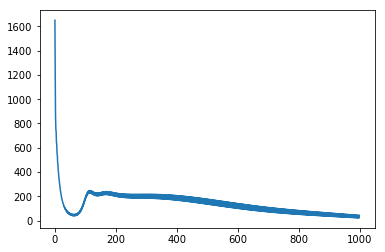

In [12]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.show()
#print(cost)

In [13]:
test_fileName = "downgesture_test.list"

test_dataset, output_testLabel = read_image(test_fileName)

output_testLabel = np.array(output_testLabel).reshape(83,1)
A2, output_prime = forward(test_dataset, W1,W2)
output_prime = convertOutputLabel(output_prime)

print("Test Accurary", accuracy(output_testLabel, output_prime))

Test Accurary 91.56626506024097


In [14]:
print("Test Data Output from Neural Network")
output_prime.reshape(1,83)

Test Data Output from Neural Network


array([[ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])